# Modelo de Predección para la compra de casas usando Keras.
### Por: Héctor Camarillo

In [1]:
# Importamos librerias para la visualizacion del dataset
# y un analisís exploratorio
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np

# Cargamos el dataset
dataset = pd.read_csv('/home/relka/Escritorio/RedesNeuronales_/Proyecto1/data/global_house_purchase_dataset.csv')



In [2]:
# Visualizamos una previa de los datos
df = dataset.copy()
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


In [3]:
df=df.drop(columns=['property_id'], axis=1)

# EDA (Exploratory Data Analysis)

In [4]:
print(f"El numero de dimension del dataset es:  {df.shape}")
print(f"\nTipo de datos:\n {df.dtypes}\n")


El numero de dimension del dataset es:  (200000, 24)

Tipo de datos:
 country                     object
city                        object
property_type               object
furnishing_status           object
property_size_sqft           int64
price                        int64
constructed_year             int64
previous_owners              int64
rooms                        int64
bathrooms                    int64
garage                       int64
garden                       int64
crime_cases_reported         int64
legal_cases_on_property      int64
customer_salary              int64
loan_amount                  int64
loan_tenure_years            int64
monthly_expenses             int64
down_payment                 int64
emi_to_income_ratio        float64
satisfaction_score           int64
neighbourhood_rating         int64
connectivity_score           int64
decision                     int64
dtype: object



In [5]:
print(f"\nValores faltantes:\n {df.isnull().sum()}\n")


Valores faltantes:
 country                    0
city                       0
property_type              0
furnishing_status          0
property_size_sqft         0
price                      0
constructed_year           0
previous_owners            0
rooms                      0
bathrooms                  0
garage                     0
garden                     0
crime_cases_reported       0
legal_cases_on_property    0
customer_salary            0
loan_amount                0
loan_tenure_years          0
monthly_expenses           0
down_payment               0
emi_to_income_ratio        0
satisfaction_score         0
neighbourhood_rating       0
connectivity_score         0
decision                   0
dtype: int64



In [6]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,200000,13,France,15628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,200000,40,Singapore,15278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,200000,6,Farmhouse,33518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
furnishing_status,200000,3,Fully-Furnished,66829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_size_sqft,200000.0,NaN,NaN,NaN,3195.63346,1613.322287,400.0,1802.0,3190.0,4589.0,6000.0
price,200000.0,NaN,NaN,NaN,1215365.1275,823663.258915,56288.0,565989.5,1023429.0,1725556.5,4202732.0
constructed_year,200000.0,NaN,NaN,NaN,1991.48777,18.494064,1960.0,1975.0,1991.0,2008.0,2023.0
previous_owners,200000.0,NaN,NaN,NaN,3.00137,2.002198,0.0,1.0,3.0,5.0,6.0
rooms,200000.0,NaN,NaN,NaN,4.513855,2.295669,1.0,3.0,5.0,7.0,8.0
bathrooms,200000.0,NaN,NaN,NaN,2.76003,1.840959,1.0,1.0,2.0,4.0,8.0


Dividamos el dataset en columnas numericas y categóricas


In [7]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

Text(0.5, 1.0, 'Decision')

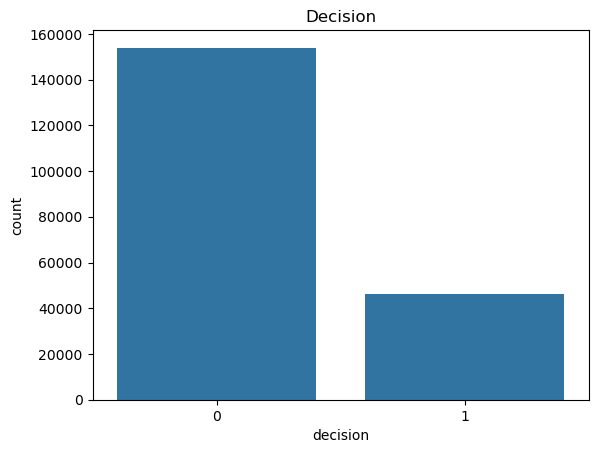

In [8]:
# Analizamos la distrubucion que tiene la variable decision
sns.countplot(data=df,x='decision')
plt.title('Decision')

Se puede observar que el dataset contiene mas datos del tipo '0', es decir, 'No compran', los datos no estan balanceados por lo que a la red se le puede dificultar mas para predicir.

/tmp/ipykernel_146471/1299910277.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],order=order, palette="Set2")


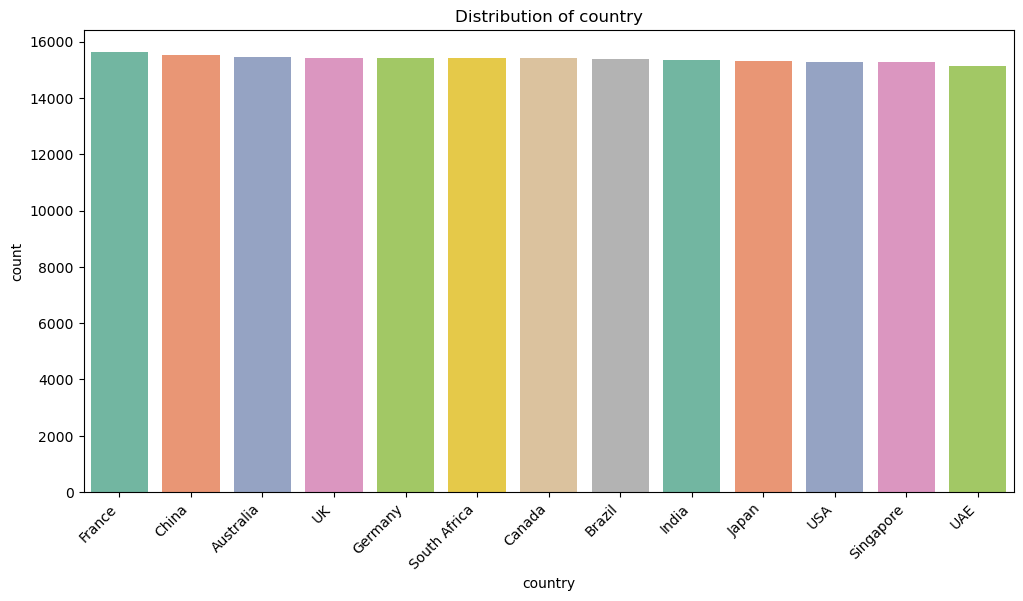

/tmp/ipykernel_146471/1299910277.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],order=order, palette="Set2")


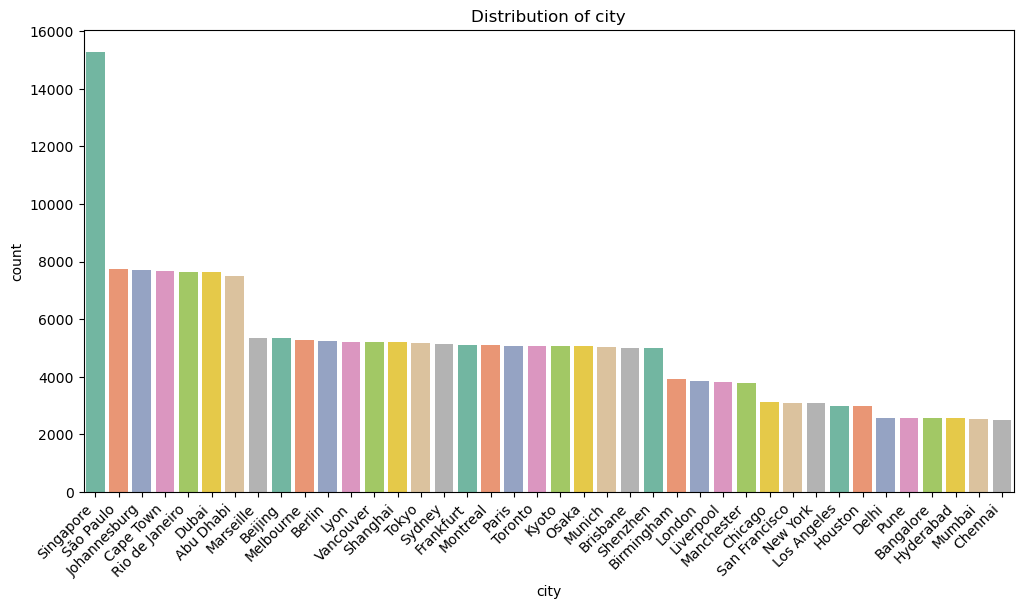

/tmp/ipykernel_146471/1299910277.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],order=order, palette="Set2")


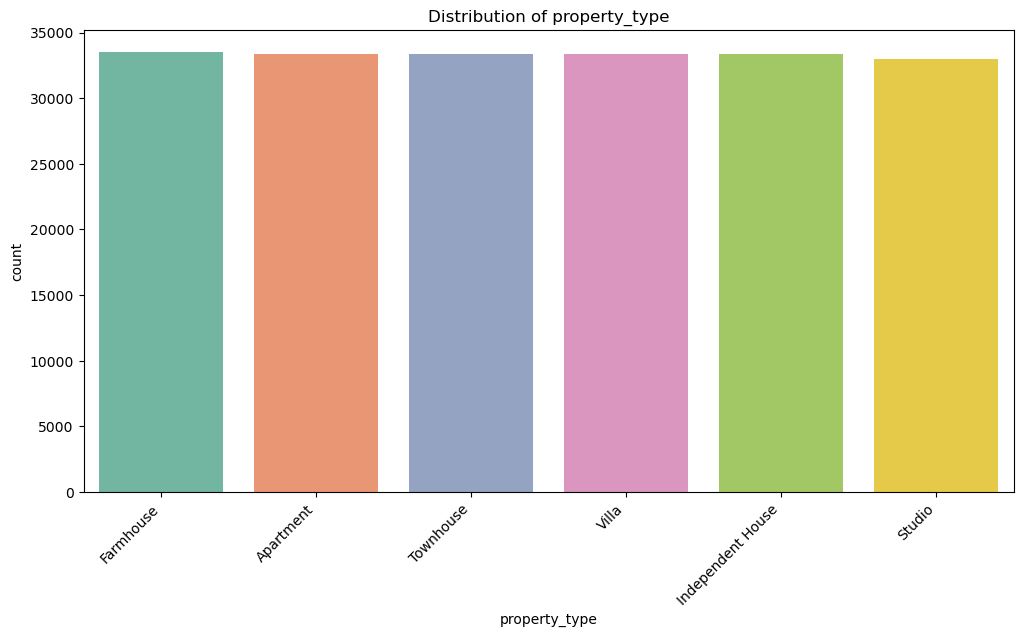

/tmp/ipykernel_146471/1299910277.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col],order=order, palette="Set2")


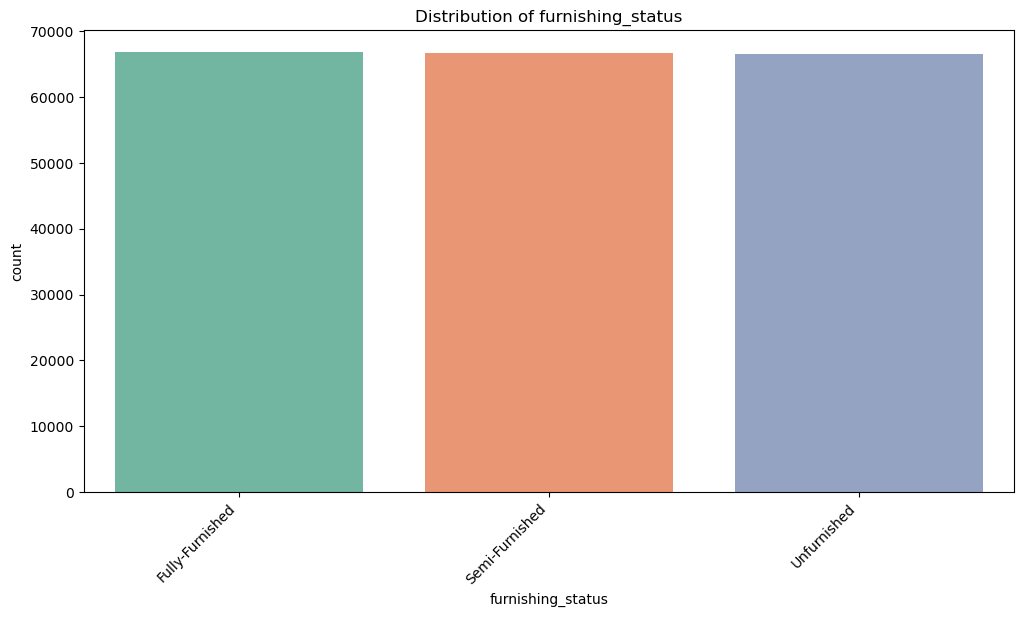

In [9]:
# Analizamos las principales distribuciones de los datos
for col in cat_cols:
    plt.figure(figsize=(12,6))
    order = df[col].value_counts().index
    sns.countplot(x=df[col],order=order, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha="right")
    plt.show()

## Creacion de una red neuronal

In [10]:
# Preprocesamiento de datos.
# Dividimos los datos en tres conjuntos: entrenamiento, validación y prueba.
# Tenemos que el tamaño de entrenamiento es de 70%, validacion 10% y prueba 20%.

# importamos librerias
from sklearn.model_selection import train_test_split

# creamos nuestra matriz de características y el vector de salida
X = df.drop(columns=['decision'])
y = df['decision']

# dividimos los datos 
X_temp, X_val, y_temp, y_val = train_test_split(
    X, y, test_size=0.1,stratify=y, random_state=42
)

# Ahora el 90% de los datos estan contenidos en X_temp y y_temp, y el 10% en X_val y y_val.
# de ese 90% sacamos X_train, y_train y X_test, y_test
rate = 0.2/0.9
X_train, X_test, y_train, y_test = train_test_split(
    X_temp, y_temp, test_size=rate,stratify=y_temp, random_state=42
)



In [11]:
# Verificacion:
print(f'La dimensión de los datos de entrenamiento es {X_train.shape}')
print(f'La dimensión de los datos de prueba es {X_test.shape}')
print(f'La dimensión de los datos de validación es {X_val.shape}')

La dimensión de los datos de entrenamiento es (140000, 23)
La dimensión de los datos de prueba es (40000, 23)
La dimensión de los datos de validación es (20000, 23)


In [12]:
# Codificacion
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_cols = selector(dtype_include=np.number)(X_train)
cat_cols = selector(dtype_exclude=np.number)(X_train)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))

])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop'
)

preprocessor.fit(X_train)
X_train_p = preprocessor.transform(X_train)
X_test_p = preprocessor.transform(X_test)
X_val_p = preprocessor.transform(X_val)

# Transformamos los y* de series a narrays
y_train = y_train.values
y_test = y_test.values
y_val = y_val.values


# Dimensiones:
print(f'Dimensiones: {X_train_p.shape, X_test_p.shape, X_val_p.shape}' )

Dimensiones: ((140000, 81), (40000, 81), (20000, 81))


## Red Neuronal

### WandB

In [13]:
""" Inicializamos WandB """

import wandb
from wandb.integration.keras import WandbMetricsLogger,WandbModelCheckpoint
wandb.login()

""" Variables iniciales """
learning_rate = 5e-3
epochs = 20
batch_size = 128
width1 = 256
width2 = 120
dropout = 0.15

wandb.init(
        project = 'Prediction-House-Purchase',
        config={
            "learning_rate": learning_rate,
            "epoch": epochs,
            "batch_size": batch_size,
            "width1": width1,
            "width2": width2,
            "dropout": dropout
        }
)

config = wandb.config

/home/relka/miniconda3/envs/Data_science_3.12/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/relka/miniconda3/envs/Data_science_3.12/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This

#### Estructura de la red

In [14]:
# Modelo con regularización L1
from scipy.special import ker
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train_p.shape[1]

# Modelo con regularización L1_L2
model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(config.width1, activation='relu'),
    layers.Dropout(config.dropout),
    layers.Dense(config.width2, activation='relu'),
    layers.Dropout(config.dropout),
    layers.Dense(1, activation='sigmoid')
])


model.summary()

2025-10-14 11:46:09.889225: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,953 (202.94 KB)

 Trainable params: 51,953 (202.94 KB)

 Non-trainable params: 0 (0.00 B)

#### Compilacion

In [15]:
from sklearn.utils.class_weight import compute_class_weight

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=config.learning_rate),
    loss="binary_crossentropy",
    metrics=[
        keras.metrics.AUC(name="AUC"),
        keras.metrics.AUC(curve="PR", name="PR_AUC"),
        "accuracy",
    ])

# Dado que hay desbalance en la target de decision

classes = np.array([0,1],dtype=np.int32)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = {int(c): float(w) for c, w in zip(classes, class_weights)}
print("class_weight:", class_weight_dict)



class_weight: {0: 0.6496338849034365, 1: 2.1707445653859274}


#### Entrenamiento 


In [16]:
history = model.fit(
    X_train_p,            # (n, 81)
    y_train,                # (n,)
    validation_data=(X_test_p, y_test),
    epochs=config.epoch,
    batch_size=config.batch_size,
    class_weight=class_weight_dict,         # claves 0 y 1
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_PR_AUC', mode='max', patience=5),
                WandbMetricsLogger(log_freq=5)],
    verbose=1,
)

model.evaluate(X_val_p, y_val, verbose=0)


Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - AUC: 0.9988 - PR_AUC: 0.9952 - accuracy: 0.9831 - loss: 0.0390 - val_AUC: 1.0000 - val_PR_AUC: 0.9999 - val_accuracy: 0.9977 - val_loss: 0.0056
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.9998 - PR_AUC: 0.9991 - accuracy: 0.9962 - loss: 0.0098 - val_AUC: 1.0000 - val_PR_AUC: 0.9998 - val_accuracy: 0.9971 - val_loss: 0.0064
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.9999 - PR_AUC: 0.9994 - accuracy: 0.9968 - loss: 0.0074 - val_AUC: 0.9999 - val_PR_AUC: 0.9991 - val_accuracy: 0.9967 - val_loss: 0.0089
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9999 - PR_AUC: 0.9994 - accuracy: 0.9973 - loss: 0.0068 - val_AUC: 1.0000 - val_PR_AUC: 1.0000 - val_accuracy: 0.9974 - val_loss: 0.0055
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.9999 - PR_AUC: 0.9993 - accuracy: 0.9974 - loss: 0.0064 - val_AUC: 1.0000 - val_PR_AUC: 1.0000 - val_accuracy: 0.9982 - val_loss: 0.0043


[0.00341009721159935,
 0.9999907612800598,
 0.9999692440032959,
 0.9988999962806702]

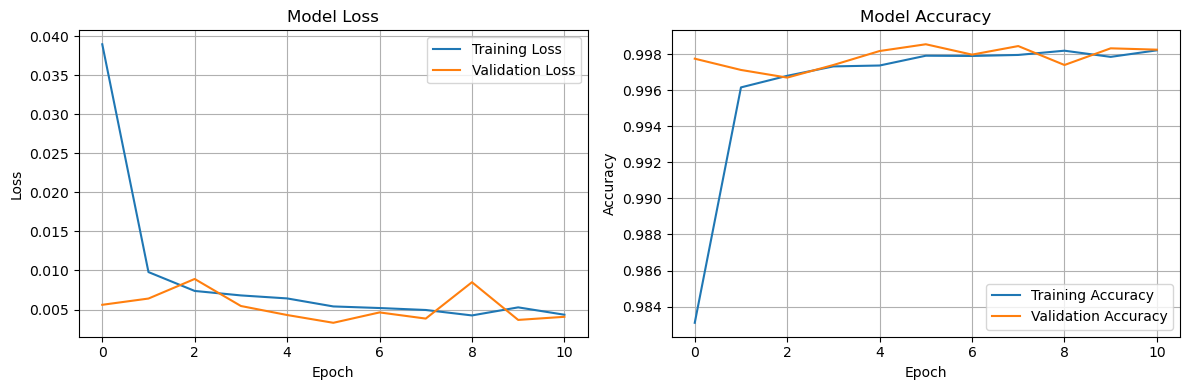

In [17]:
# Gráfica de pérdida de entrenamiento vs validación
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

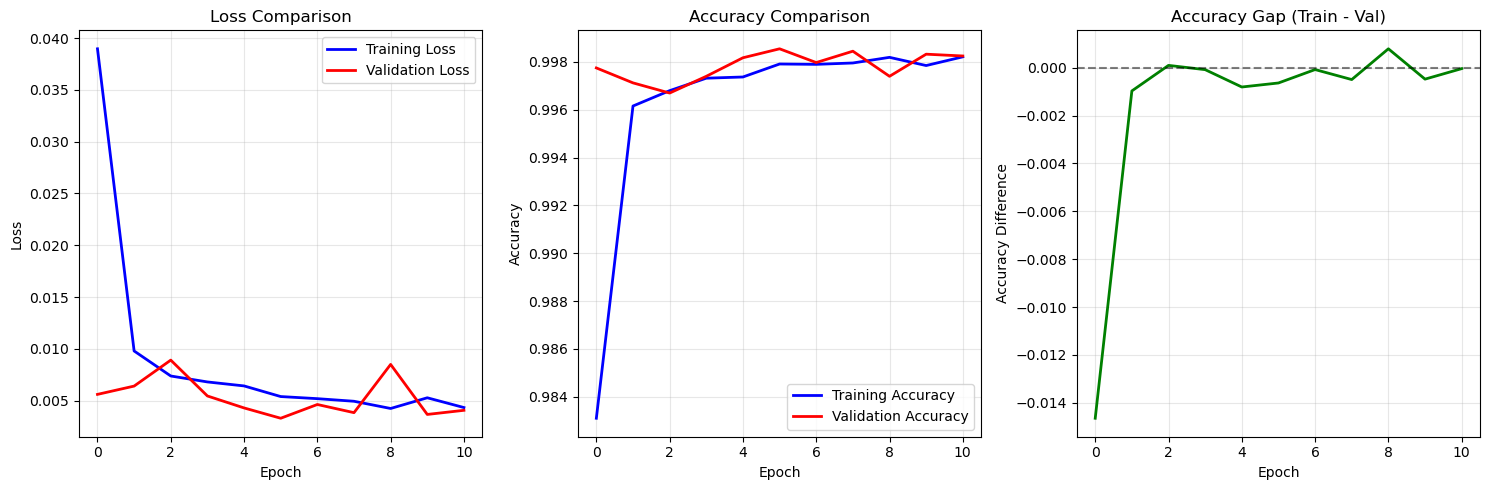

In [18]:
# Análisis detallado de overfitting
plt.figure(figsize=(15, 5))

# Loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Diferencia entre training y validation
plt.subplot(1, 3, 3)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
diff_acc = [t - v for t, v in zip(train_acc, val_acc)]
plt.plot(diff_acc, 'g-', linewidth=2)
plt.title('Accuracy Gap (Train - Val)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Difference')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [19]:
# Resumen estadístico del entrenamiento
print("=== RESUMEN DEL ENTRENAMIENTO ===")
print(f"Épocas totales: {len(history.history['loss'])}")
print(f"Mejor accuracy de entrenamiento: {max(history.history['accuracy']):.4f}")
print(f"Mejor accuracy de validación: {max(history.history['val_accuracy']):.4f}")
print(f"Mejor loss de entrenamiento: {min(history.history['loss']):.4f}")
print(f"Mejor loss de validación: {min(history.history['val_loss']):.4f}")

# Análisis de overfitting
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
overfitting_gap = final_train_acc - final_val_acc

print(f"\n=== ANÁLISIS DE OVERFITTING ===")
print(f"Diferencia final (Train - Val): {overfitting_gap:.4f}")
if overfitting_gap > 0.05:
    print("⚠️  Posible overfitting detectado")
elif overfitting_gap < -0.05:
    print("⚠️  Posible underfitting detectado")
else:
    print("✅ Buen balance entre entrenamiento y validación")

=== RESUMEN DEL ENTRENAMIENTO ===
Épocas totales: 11
Mejor accuracy de entrenamiento: 0.9982
Mejor accuracy de validación: 0.9985
Mejor loss de entrenamiento: 0.0042
Mejor loss de validación: 0.0033

=== ANÁLISIS DE OVERFITTING ===
Diferencia final (Train - Val): -0.0000
✅ Buen balance entre entrenamiento y validación


## Optuna:

In [20]:
# import urllib
# import optuna
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.utils.class_weight import compute_class_weight

# opener = urllib.request.build_opener()
# opener.addheaders = [('User-agent', 'Mozilla/5.0')]
# urllib.request.install_opener(opener)



# def objective(trial):
#     # Espacio de búsqueda
#     width1 = trial.suggest_int("width1", 64, 512, step=64)
#     width2 = trial.suggest_int("width2", 64, 512, step=64)
#     dropout= trial.suggest_float("dropout", 0.2, 0.5)    # regularización
#     lr     = trial.suggest_float("lr", 1e-4, 5e-3, log=True)
#     opt    = trial.suggest_categorical("optimizer", ["adam", "rmsprop"])

#     input_dim = X_train_p.shape[1]
#     model = keras.Sequential([
#         layers.Input(shape=(input_dim,)),
#         layers.Dense(width1, activation=trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])),
#         layers.Dropout(dropout),
#         layers.Dense(width2, activation=trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])),
#         layers.Dropout(dropout),
#         layers.Dense(1, activation='sigmoid')
#     ])
#     opt_obj = keras.optimizers.Adam(lr) if opt=="adam" else keras.optimizers.RMSprop(lr)
#     model.compile(optimizer=opt_obj,
#                   loss='binary_crossentropy', 
#                   metrics=[keras.metrics.AUC(name="AUC"),
#                            keras.metrics.AUC(curve="PR", name="PR_AUC"),
#                            "Accuracy"],
#                            )

#     batch_size = trial.suggest_int("batch_size", 70, 280, step=70)
#     epochs = trial.suggest_int("epochs", 20, 100, step=10)
#     callbacks = [
#         keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",
#                                       patience=8, restore_best_weights=True)
#     ]

#     history = model.fit(
#         X_train_p, y_train,
#         validation_split=0.2,
#         shuffle=True,
#         epochs=epochs,
#         batch_size=batch_size,
#         class_weight=class_weight_dict,
#         callbacks=callbacks,
#         verbose=0,
#     )

#     score = model.evaluate(X_test_p, y_test, verbose=0)
#     return score[1]

# if __name__ == "__main__":
#     study = optuna.create_study(direction="maximize")
#     study.optimize(objective, n_trials=10, timeout=600)

#     print("Number of finished trials: {}".format(len(study.trials)))

#     print("Best trial:")
#     trial = study.best_trial

#     print("  Value: {}".format(trial.value))

#     print("  Params: ")
#     for key, value in trial.params.items():
#         print("    {}: {}".format(key, value))